### Interoperability Data analysis

In [4]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# Load the CSV data
df = pd.read_csv('files/transaction_data.csv',delimiter=";")

df.head()

,Transaction,Tx address,Timestamp,Tx Fee ETH,Gas Price Gwei,Run No.,encode_tx_At
0,requestCat,0xfd94bcca5a8d637668bacdaafa95434ec57740adbc62...,Aug-16-2023 09:02:12 PM +UTC,0.00065811312218181 ETH\n$0.00,3.55412149 Gwei (0.00000000355412149 ETH),18.0,2023-08-16T21:02:37.747104Z
1,requestCat,0x2d2f524f98e0f0c5b169f683623a1431c1fdf007821d...,Aug-16-2023 09:02:24 PM +UTC,0.000661662770989461 ETH\n$0.00,3.573291269 Gwei (0.000000003573291269 ETH),19.0,2023-08-16T21:02:49.667171Z
2,requestCat,0xd96356ff6dfac097c3324c89e5cc59e5467ad6516b1c...,Aug-16-2023 09:02:36 PM +UTC,0.000663588072333045 ETH\n$0.00,3.583688805 Gwei (0.000000003583688805 ETH),20.0,2023-08-16T21:03:13.536574Z
3,requestCat,0xb4809529ad1a259f93335e63f0e99864017afaa5e75b...,Aug-16-2023 09:02:48 PM +UTC,0.000644327851379049 ETH\n$0.00,3.479674521 Gwei (0.000000003479674521 ETH),21.0,2023-08-16T21:03:26.682269Z
4,requestCat,0x74d5cd5695a79ec321f22eca8e14847bf82e1b79cc17...,Aug-16-2023 09:03:12 PM +UTC,0.000642052405455591 ETH\n$0.00,3.467386039 Gwei (0.000000003467386039 ETH),22.0,2023-08-16T21:03:50.673760Z


In [6]:
# Data cleaning, extraction and analysis
def data_box_plot(column):

  # Create a dataframe copy
  data = df.copy()

  if column == 'Time_Difference':
    # Convert Timestamp to datetime objects using specific format
    data['Timestamp'] = pd.to_datetime(data['Timestamp'], format='%b-%d-%Y %I:%M:%S %p +UTC').dt.tz_localize('UTC')

    # Convert encode_tx_At to datetime
    data['encode_tx_At'] = pd.to_datetime(data['encode_tx_At'])

    # Calculate the difference between encode_tx_At and Timestamp in seconds
    data['Time_Difference'] = ((data['encode_tx_At'] - data['Timestamp']).dt.total_seconds()).astype(float)

  elif column == 'Gas_Price_Gwei':
    # Extract data using regular expressions
    # Example: from 3.55412149 Gwei (0.00000000355412149 ETH) to 3.55412149
    data['Gas_Price_Gwei'] = data['Gas Price Gwei'].str.extract(r'([\d.]+)')[0].astype(float)

  elif column == 'Tx_Fee_ETH':
    # Extract data using regular expressions
    # Example: from 0.00065811312218181 ETH\n$0.00 to 0.00065811312218181
    data['Tx_Fee_ETH'] = data['Tx Fee ETH'].str.extract(r'([\d.]+)')[0].astype(float)

  # Create a dictionary to store data for different transaction types
  data_by_tx_type = {
    'requestCat': data[data['Transaction'] == 'requestCat'][column],
    'requestListing': data[data['Transaction'] == 'requestListing'][column],
    'requestPurchasing': data[data['Transaction'] == 'requestPurchasing'][column]
  }

  # Calculate overall average
  overall_average = data[column].mean()

  # Generate statistics for each transaction type 
  for tx_type, values in data_by_tx_type.items():
      print(f"Summary Statistics for Transaction Type: {tx_type}")
      print(values.describe())
      print("-" * 40)

  # Create boxplot
  plt.figure(figsize=(5, 5))
  plt.boxplot(data_by_tx_type.values(), vert=True, labels=data_by_tx_type.keys())
  
  plt.ylabel(column)
  plt.title(f'{column} Distribution across Transaction Types')

  # Annotate overall average as a horizontal dashed line
  plt.axhline(y=overall_average, color='b', linestyle='--', label=f'Overall Avg: {overall_average:.6f}')
  plt.legend()

  plt.grid(True)
  plt.tight_layout()

  plt.savefig('files/'+column+'.png')
  plt.show()

Summary Statistics for Transaction Type: requestCat
count    39.000000
mean     31.186715
std       9.622225
min      25.479418
25%      25.624496
50%      26.526088
75%      37.574354
max      63.616548
Name: Time_Difference, dtype: float64
----------------------------------------
Summary Statistics for Transaction Type: requestListing
count    39.000000
mean     32.233657
std       7.714258
min      25.480118
25%      25.626696
50%      26.685415
75%      37.626875
max      50.660322
Name: Time_Difference, dtype: float64
----------------------------------------
Summary Statistics for Transaction Type: requestPurchasing
count    39.000000
mean     30.790025
std       7.036131
min      25.513449
25%      26.508153
50%      26.547449
75%      38.043054
max      51.521777
Name: Time_Difference, dtype: float64
----------------------------------------


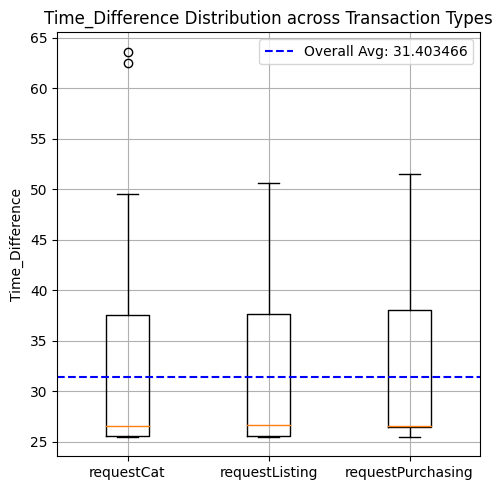

In [7]:
data_box_plot('Time_Difference')

Summary Statistics for Transaction Type: requestCat
count    39.000000
mean      3.039775
std       0.244437
min       2.810474
25%       2.877238
50%       2.924966
75%       3.125469
max       3.583689
Name: Gas_Price_Gwei, dtype: float64
----------------------------------------
Summary Statistics for Transaction Type: requestListing
count    39.000000
mean      3.019284
std       0.033849
min       2.932368
25%       2.998418
50%       3.018791
75%       3.042998
max       3.091038
Name: Gas_Price_Gwei, dtype: float64
----------------------------------------
Summary Statistics for Transaction Type: requestPurchasing
count    39.000000
mean      3.485860
std       0.394894
min       3.124710
25%       3.177490
50%       3.276237
75%       3.956004
max       4.216510
Name: Gas_Price_Gwei, dtype: float64
----------------------------------------


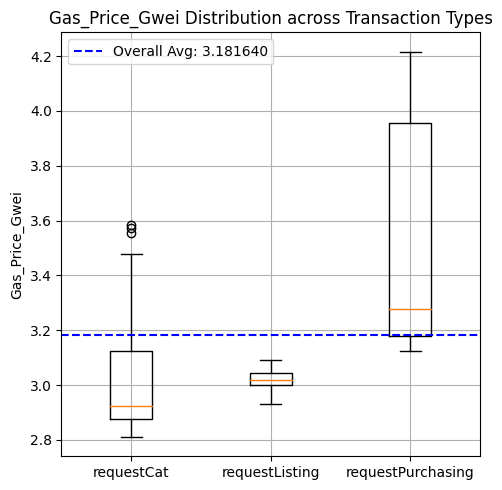

In [8]:
data_box_plot('Gas_Price_Gwei')

Summary Statistics for Transaction Type: requestCat
count    39.000000
mean      0.000562
std       0.000045
min       0.000520
25%       0.000533
50%       0.000542
75%       0.000571
max       0.000664
Name: Tx_Fee_ETH, dtype: float64
----------------------------------------
Summary Statistics for Transaction Type: requestListing
count    39.000000
mean      0.000589
std       0.000021
min       0.000569
25%       0.000582
50%       0.000586
75%       0.000590
max       0.000712
Name: Tx_Fee_ETH, dtype: float64
----------------------------------------
Summary Statistics for Transaction Type: requestPurchasing
count    39.000000
mean      0.000677
std       0.000077
min       0.000606
25%       0.000616
50%       0.000636
75%       0.000769
max       0.000823
Name: Tx_Fee_ETH, dtype: float64
----------------------------------------


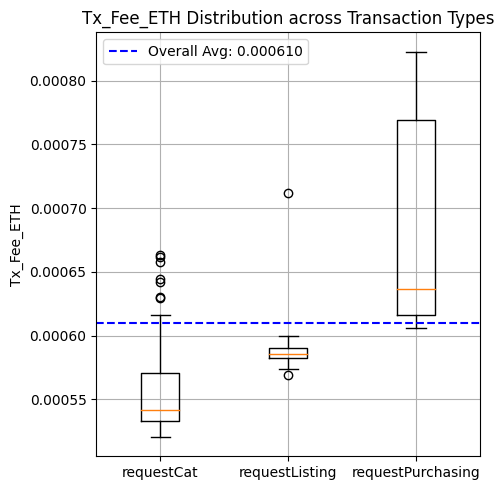

In [9]:
data_box_plot('Tx_Fee_ETH')